<a href="https://colab.research.google.com/github/castrigno22/geopandas/blob/main/prepSommativaPDeGPD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.1 MB/s 
     |████████████████████████████████| 16.7 MB 167 kB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 6.5 MB/s 


In [ ]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas
import pymongo 
import matplotlib.pyplot as plt
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import numpy as np
import shapely.geometry
import pymongo
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import per utilizzare le sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   695k      0 --:--:-- --:--:-- --:--:--  694k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for 

In [ ]:
reg = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/Reg01012021_g")
reg

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


In [ ]:
prov = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/ProvCM01012021_g")
prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
com = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/Com01012021_g")
com

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
redditi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.zip", sep = ";", index_col = False)
redditi

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,Reddito complessivo da 15000 a 26000 euro - Ammontare in euro,Reddito complessivo da 26000 a 55000 euro - Frequenza,Reddito complessivo da 26000 a 55000 euro - Ammontare in euro,Reddito complessivo da 55000 a 75000 euro - Frequenza,Reddito complessivo da 55000 a 75000 euro - Ammontare in euro,Reddito complessivo da 75000 a 120000 euro - Frequenza,Reddito complessivo da 75000 a 120000 euro - Ammontare in euro,Reddito complessivo oltre 120000 euro - Frequenza,Reddito complessivo oltre 120000 euro - Ammontare in euro,
0,2020,A001,28001,ABANO TERME,PD,Veneto,5,14831,7564,9593119,...,92436441,3268.0,114839495.0,413.0,26106754.0,400.0,37267762.0,177.0,35077122.0,NaN
1,2020,A004,98001,ABBADIA CERRETO,LO,Lombardia,3,208,89,78204,...,1479857,41.0,1302555.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020,A005,97001,ABBADIA LARIANA,LC,Lombardia,3,2451,1205,1802637,...,16331433,656.0,22609959.0,78.0,4903386.0,48.0,4323860.0,31.0,5299024.0,NaN
3,2020,A006,52001,ABBADIA SAN SALVATORE,SI,Toscana,9,4855,2667,2731533,...,36058075,754.0,25651776.0,69.0,4391549.0,33.0,3001230.0,13.0,2879460.0,NaN
4,2020,A007,95001,ABBASANTA,OR,Sardegna,20,1728,885,739857,...,8893696,430.0,14325272.0,26.0,1655926.0,13.0,1172342.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2020,M428,75098,PRESICCE-ACQUARICA,LE,Puglia,16,6251,2376,2132368,...,20405915,580.0,19690477.0,31.0,1911397.0,25.0,2212573.0,15.0,3447739.0,NaN
7900,2020,M429,22252,BORGO D'ANAUNIA,TN,Trentino Alto Adige(P.A.Trento),4,2050,803,1304716,...,11623910,498.0,17366505.0,35.0,2265069.0,21.0,1848437.0,8.0,1959769.0,NaN
7901,2020,M430,22253,NOVELLA,TN,Trentino Alto Adige(P.A.Trento),4,3579,1210,1659890,...,18647708,667.0,22868038.0,40.0,2490656.0,31.0,2852464.0,10.0,1876163.0,NaN
7902,2020,M431,22254,VILLE DI FIEMME,TN,Trentino Alto Adige(P.A.Trento),4,2102,896,1015747,...,13983907,497.0,17515916.0,47.0,2946010.0,21.0,2064994.0,20.0,3869894.0,NaN


1) l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

In [ ]:
redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]

0       170054564
1         1958895
2        31937559
3        42798957
4        15680272
          ...    
7899     33973740
7900     19621943
7901     30243213
7902     24858818
7903      9504369
Name: Reddito da lavoro dipendente e assimilati - Ammontare in euro, Length: 7904, dtype: int64

In [ ]:
dfGropRed=redditi.groupby("Regione").sum()[["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]].reset_index().sort_values("Regione",ascending=True)
dfGropRed

,Regione,Reddito da lavoro dipendente e assimilati - Ammontare in euro
0,Abruzzo,8630694868
1,Basilicata,3253520979
2,Calabria,8874571427
3,Campania,29234030010
4,Emilia Romagna,42005290452
5,Friuli Venezia Giulia,10859135283
6,Lazio,47652752811
7,Liguria,11998356163
8,Lombardia,100577385797
9,Mancante/errata,9504369


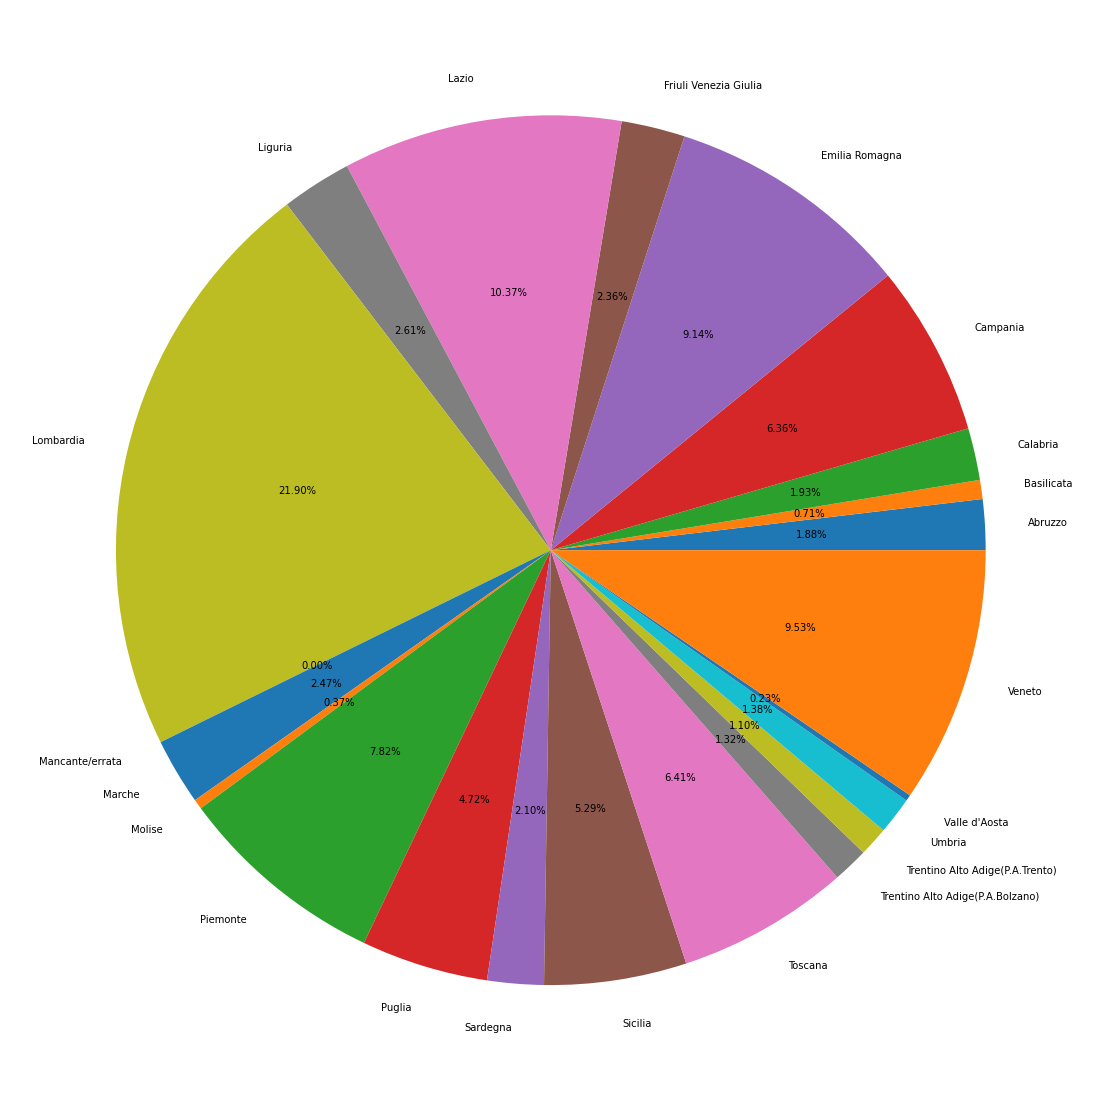

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
ax.pie(dfGropRed["Reddito da lavoro dipendente e assimilati - Ammontare in euro"], labels=dfGropRed["Regione"],autopct= '%.2f%%')
plt.show()

2)l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali\

In [ ]:
redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]

0       170054564
1         1958895
2        31937559
3        42798957
4        15680272
          ...    
7899     33973740
7900     19621943
7901     30243213
7902     24858818
7903      9504369
Name: Reddito da lavoro dipendente e assimilati - Ammontare in euro, Length: 7904, dtype: int64

In [ ]:
redditiProv = pd.merge(redditi, prov, how="inner", left_on= ["Sigla Provincia"], right_on = ["SIGLA"])
redditiProv.head(10)

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,2020,A001,28001,ABANO TERME,PD,Veneto,5,14831,7564,9593119,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
1,2020,A075,28002,AGNA,PD,Veneto,5,2285,1234,976622,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
2,2020,A161,28003,ALBIGNASEGO,PD,Veneto,5,19053,11136,11651098,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
3,2020,A296,28004,ANGUILLARA VENETA,PD,Veneto,5,3094,1558,930326,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
4,2020,A434,28005,ARQUA' PETRARCA,PD,Veneto,5,1370,763,910309,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
5,2020,A438,28006,ARRE,PD,Veneto,5,1582,862,598929,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
6,2020,A458,28007,ARZERGRANDE,PD,Veneto,5,3502,1741,1143806,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
7,2020,A568,28008,BAGNOLI DI SOPRA,PD,Veneto,5,2511,1147,752958,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
8,2020,A613,28009,BAONE,PD,Veneto,5,2353,1313,1313991,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."
9,2020,A637,28010,BARBONA,PD,Veneto,5,477,216,118835,...,0,28,Padova,-,Padova,PD,Provincia,327147.279565,2.144973e+09,"POLYGON ((721166.228 5062156.842, 721256.477 5..."


In [ ]:
dfGropProv=redditiProv.groupby("DEN_UTS").sum()[["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]].reset_index().sort_values("DEN_UTS",ascending=True)
dfGropProv

,DEN_UTS,Reddito da lavoro dipendente e assimilati - Ammontare in euro
0,Agrigento,1865200517
1,Alessandria,3262939356
2,Ancona,3770869070
3,Aosta,1058888309
4,Arezzo,2626875589
...,...,...
101,Vercelli,1334246644
102,Verona,8417770760
103,Vibo Valentia,709318575
104,Vicenza,7975650512


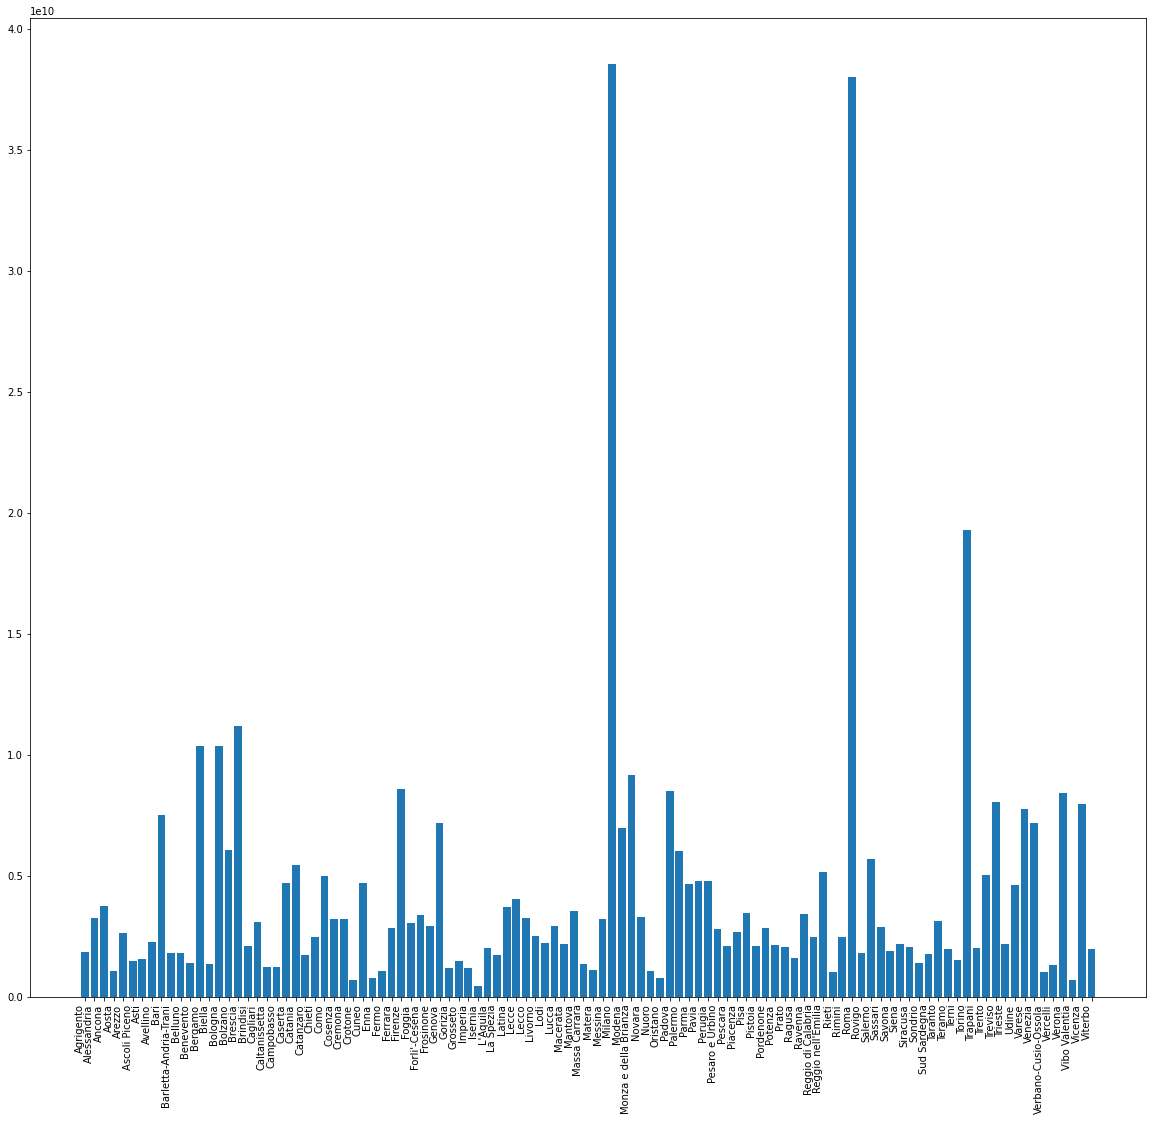

In [ ]:
fig,ax = plt.subplots(figsize = (20,20))
fig.autofmt_xdate(rotation=90)
ax.bar(dfGropProv["DEN_UTS"],dfGropProv["Reddito da lavoro dipendente e assimilati - Ammontare in euro"])
plt.show()

3)la prime 10 province più ricche

In [ ]:
dfGropProv.sort_values("Reddito da lavoro dipendente e assimilati - Ammontare in euro", ascending = False, inplace = True)
dfGropProv.head(10)

,DEN_UTS,Reddito da lavoro dipendente e assimilati - Ammontare in euro
55,Milano,38517549666
80,Roma,37999769772
92,Torino,19280579859
16,Brescia,11197648824
12,Bergamo,10386917812
14,Bologna,10365898216
57,Monza e della Brianza,9189826579
33,Firenze,8572746818
61,Padova,8494582296
102,Verona,8417770760


4)la provincia più ricca

In [ ]:
dfGropProv.sort_values("Reddito da lavoro dipendente e assimilati - Ammontare in euro", ascending = False, inplace = True)
dfGropProv.head(1)

,DEN_UTS,Reddito da lavoro dipendente e assimilati - Ammontare in euro
55,Milano,38517549666


5) il reddito medio per ogni regione. Ordinare in ordine decrescente a partire dalla regione con il reddito medio più alto

In [ ]:
dfGropRed=redditiProv.groupby("Regione").mean()[["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]].sort_values("Reddito da lavoro dipendente e assimilati - Ammontare in euro",ascending=False)
dfGropRed

,Reddito da lavoro dipendente e assimilati - Ammontare in euro
Regione,
Emilia Romagna,1.272888e+08
Lazio,1.260655e+08
Toscana,1.077726e+08
Puglia,8.441271e+07
Veneto,7.776259e+07
Umbria,6.869966e+07
Lombardia,6.678445e+07
Sicilia,6.228317e+07
Trentino Alto Adige(P.A.Bolzano),5.219408e+07


6) dato il nome di una regione, inserito dall'utente, avere l'elenco delle province della regione con il reddito complessivo e il reddito medio

In [ ]:
nomeReg = input("Inserire il nome della regione")
regEffettiva = redditiProv[redditiProv["Regione"] == nomeReg]
provRegEffettiva = regEffettiva.groupby("DEN_UTS").agg({"Reddito da lavoro dipendente e assimilati - Ammontare in euro" :["mean", "sum"]})
provRegEffettiva

Inserire il nome della regioneLombardia


Reddito da lavoro dipendente e assimilati - Ammontare in euro  \
                                                                               mean   
DEN_UTS                                                                               
Bergamo                                                     4.274452e+07              
Brescia                                                     5.462268e+07              
Como                                                        3.387453e+07              
Cremona                                                     2.858722e+07              
Lecco                                                       3.909476e+07              
Lodi                                                        3.744301e+07              
Mantova                                                     5.545818e+07              
Milano                                                      2.896056e+08              
Monza e della Brianza                                       1.670878e+08              
Pavia                                                       2.575870e+07              
Sondrio                                                     1.825036e+07              
Varese                                                      5.627099e+07              

                                    
                               sum  
DEN_UTS                             
Bergamo                10386917812  
Brescia                11197648824  
Como                    5013430649  
Cremona                 3230356097  
Lecco                   3283959863  
Lodi                    2246580820  
Mantova                 3549323511  
Milano                 38517549666  
Monza e della Brianza   9189826579  
Pavia                   4791117678  
Sondrio                 1405278047  
Varese                  7765396251

In [ ]:
nomeReg = input("Inserire il nome della regione")
regEffettiva = redditiProv[redditiProv["Regione"] == nomeReg]
provRegEffettiva = regEffettiva.groupby("DEN_UTS").agg(media = ("Reddito da lavoro dipendente e assimilati - Ammontare in euro" , "mean") , somma = ("Reddito da lavoro dipendente e assimilati - Ammontare in euro" , sum) )
provRegEffettiva

Inserire il nome della regioneLombardia


,media,somma
DEN_UTS,,
Bergamo,4.274452e+07,10386917812
Brescia,5.462268e+07,11197648824
Como,3.387453e+07,5013430649
Cremona,2.858722e+07,3230356097
Lecco,3.909476e+07,3283959863
Lodi,3.744301e+07,2246580820
Mantova,5.545818e+07,3549323511
Milano,2.896056e+08,38517549666
Monza e della Brianza,1.670878e+08,9189826579


7)dato il nome di una provincia, inserito dall'utente, avere l'elenco dei comuni della provincia con il reddito. Ordinare in ordine crescente sul reddito.